# Configuração do Ambiente

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from typing import Dict
from time import time

# Implementação do K-Nearest Neighbors

In [74]:
class KNN:
  def __init__(self, data: pd.DataFrame):
    self.data = data


  def predict(self, p: Dict, k: int = 0) -> str:
    """
    Define a classe de um ponto com base nos k vizinhos mais próximos.
    Sendo a classe do ponto a classe predominante na vizinhança.
    """
    if k <= 0:
      k = int(sqrt(self.data.shape[0]))

    x = p['Width']
    y = p['Height']

    dists = list()
    # Calcula as distâncias de cada ponto
    for index in range(self.data.shape[0]):
      xi = self.data.loc[index, 'Width']
      yi = self.data.loc[index, 'Height']
      dist = sqrt((x-xi)**2 + (y-yi)**2)
      # Guarda o índice e a distância para cada ponto
      dists.append((index, dist))
    # Ordena com base nas distâncias
    dists.sort(key=lambda x: x[1])
    # Guarda apenas os índices dos k vizinhos mais próximos
    indexes = [dist[0] for dist in dists[:k]]
    # Guarda as classes das linhas do DataFrame dos índices mais próximos
    neighbors = self.data['Class'].iloc[indexes].tolist()
    # Verifica a classe mais frequente. Em caso de mais de uma classe com frequência
    # máxima, a que tiver um elemento mais próximo será considerada. (A primeira a aparecer)
    max_count = 0
    max_class = ''
    for class_i in set(neighbors):
      count = neighbors.count(class_i)
      if count > max_count:
        max_count = count
        max_class = class_i
    # Retorna a classe mais frequente
    return max_class


  def test(self, test_values) -> float:
    tot_sucess = 0
    for idx in range(test_values.shape[0]):
      width = test_values['Width'].iloc[idx]
      height = test_values['Height'].iloc[idx]
      class_i = test_values['Class'].iloc[idx]
      predict_class = self.predict(p={'Width': width, 'Height': height})
      if class_i == predict_class:
        tot_sucess += 1

    return tot_sucess / test_values.shape[0]


  def show(self, colors_dict) -> None:

    # Obtém as cores de cada classe
    colors = self.data['Class'].map(colors_dict)

    # Gera o gráfico de dispersão
    plt.scatter(self.data['Width'], self.data['Height'], c=colors, s=30)

    plt.title('Altura e Largura de cada fruta')

    plt.xlabel('Width (cm)')
    plt.xlim(0, 40)
    plt.xticks(range(0, 40, 2))

    plt.ylabel('Height (cm)')
    plt.ylim(0, 40)
    plt.yticks(range(0, 40, 2))
    # Adiciona a legenda ao gráfico
    legend = []
    for class_i, color in colors_dict.items():
        legend.append(plt.Line2D([0], [0], marker='o', color='w', label=class_i,
                                 markersize=10, markerfacecolor=color))
    plt.legend(handles=legend)

    plt.show()

# Obtenção dos dados

In [3]:
size = 100
# Dados de entrada sobre as frutas para a geração dos dados aleatórios.
inputs = [{'Class':     'Banana', 'Mean_height': 18, 'Std_height':   3, 'Mean_width':  5, 'Std_width':   1},
          {'Class':      'Apple', 'Mean_height': 10, 'Std_height': 1.5, 'Mean_width': 12, 'Std_width': 1.5},
          {'Class':      'Lemon', 'Mean_height':  5, 'Std_height':   1, 'Mean_width':  5, 'Std_width':   1},
          {'Class': 'Watermelon', 'Mean_height': 20, 'Std_height': 2.5, 'Mean_width': 25, 'Std_width':   3},
          {'Class':     'Papaya', 'Mean_height': 28, 'Std_height':   3, 'Mean_width': 15, 'Std_width':   2},
          {'Class':      'Mango', 'Mean_height': 17, 'Std_height': 1.5, 'Mean_width': 12, 'Std_width': 1.5},
          {'Class': 'Strawberry', 'Mean_height':  4, 'Std_height': 0.5, 'Mean_width':  2, 'Std_width': 0.5},
          {'Class':      'Grape', 'Mean_height':  2, 'Std_height': 0.5, 'Mean_width':  2, 'Std_width': 0.5}]

heights = np.array([])
widths = np.array([])
classes = []
# Para cada entrada, acessa a média e o desvio padrão da altura e largura de cada
# fruta e gera uma amostra com base da distribuição normal desses dados.
for input_i in inputs:
  loc_h   = input_i['Mean_height']
  scale_h = input_i['Std_height']
  height = np.random.normal(loc=loc_h, scale=scale_h, size=size)
  heights = np.concatenate([heights, height])

  loc_w   = input_i['Mean_width']
  scale_w = input_i['Std_width']
  width  = np.random.normal(loc=loc_w, scale=scale_w, size=size)
  widths = np.concatenate([widths, width])

  classes += [input_i['Class']] * size


# Criando um DataFrame com os dados
df = pd.DataFrame({
    'Width': widths,
    'Height': heights,
    'Class': classes
})

df

,Width,Height,Class
0,6.145502,17.970148,Banana
1,7.037683,17.744396,Banana
2,4.704066,13.961905,Banana
3,3.790130,15.319348,Banana
4,5.272649,25.140180,Banana
...,...,...,...
795,2.767972,2.548541,Grape
796,0.607927,1.601971,Grape
797,1.642787,1.945997,Grape
798,2.149623,2.583261,Grape


In [35]:
def split_train_test(data: pd.DataFrame, porc_train: float = 80):
  train = int(df.shape[0] * porc_train / 100)
  # Escolhe 640 valores aleatórios entre 0 e 800, sem repetição
  train_idx = np.random.choice(np.arange(df.shape[0]), size=train, replace=False)
  test_idx = [idx for idx in np.arange(df.shape[0]) if idx not in train_idx]

  return df.iloc[train_idx].reset_index(drop=True), \
         df.iloc[test_idx].reset_index(drop=True)

In [62]:
train, test = split_train_test(df)

# Testes

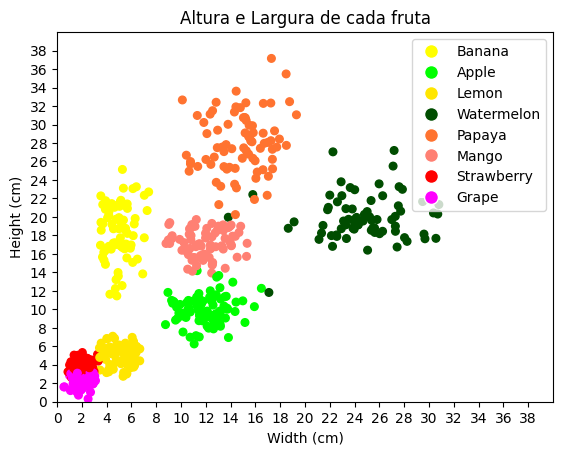

In [75]:
knn = KNN(train)

knn.show({'Banana':     (1,    1,    0),
          'Apple':      (0,    1,    0),
          'Lemon':      (1,  0.9,    0),
          'Watermelon': (0,  0.3,    0),
          'Papaya':     (1, 0.45, 0.19),
          'Mango':      (1,  0.5, 0.45),
          'Strawberry': (1,    0,    0),
          'Grape':      (1,    0,    1)})

In [76]:
# Acurácia do modelo
knn.test(test)

0.99375

In [ ]:
st = time()
inputs = [(3, 2), (6, 20), (2, 5), (6, 7), (30, 20), (15, 28), (14, 18), (12, 10)]
for width, height in inputs:
  pred_class = knn.predict(p={'Width': width, 'Height': height})
  print(f'Width: {width:3}, Height: {height:3}, predict: {pred_class}')

print(time()-st)

Width:   3, Height:   2, predict: Grape
Width:   6, Height:  20, predict: Banana
Width:   2, Height:   5, predict: Strawberry
Width:   6, Height:   7, predict: Lemon
Width:  30, Height:  20, predict: Watermelon
Width:  15, Height:  28, predict: Papaya
Width:  14, Height:  18, predict: Mango
Width:  12, Height:  10, predict: Apple
0.13054132461547852
